# Time Series - NYC Average High Temperatures 1895-2018

### Data Acquisition

In [1]:
import pandas as pd

In [2]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [3]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         124 non-null    int64  
 1   Temperature  124 non-null    float64
 2   Anomaly      124 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.0 KB


In [4]:
# remove the 01 from all dates dividing the int by 10
nyc.Date = nyc.Date.floordiv(100)
nyc.head()

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


### Splitting the Data for Training and Testing

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# need to reshape the Date column so that we can use it with an estimator
X_train, X_test, y_train, y_test = train_test_split(
    nyc.Date.values.reshape(-1, 1), nyc.Temperature.values,
    random_state=11
)

In [7]:
# check the training and test data shapes
X_train.shape

(93, 1)

In [8]:
X_test.shape

(31, 1)

### Model training

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
linear_regression = LinearRegression()

In [11]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [12]:
linear_regression.coef_

array([0.01939167])

In [13]:
linear_regression.intercept_

-0.30779820252656265

### Model Testing

In [14]:
predicted = linear_regression.predict(X_test)

In [15]:
expected = y_test

In [16]:
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Predicting using curve slope (coef) and intercept 

In [17]:
predict = (lambda year: linear_regression.coef_ * year +
                     linear_regression.intercept_)

# y = ax + b => y = 0.01939167 * year + -0.30779820252656265

In [18]:
# 'future'
predict(2020)

array([38.86338185])

In [20]:
# 'past'
predict(1890)

array([36.34246432])

### Plotting the Regression Line

In [21]:
import seaborn as sns

(10.0, 70.0)

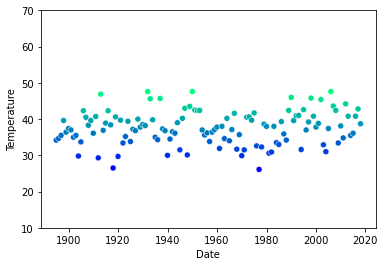

In [50]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10, 70) # scale the y axis to see the linear relationship better

<AxesSubplot:xlabel='Date', ylabel='Temperature'>

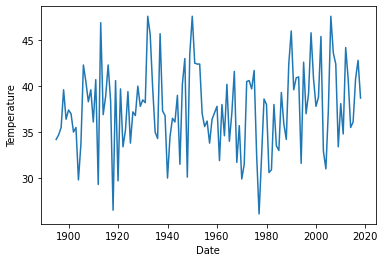

In [25]:
sns.lineplot(data=nyc, x='Date', y='Temperature')

In [51]:
import numpy as np

In [58]:
x = np.array([nyc.Date.min(), nyc.Date.max()]) # getting min and max x values

In [63]:
y = predict(x)

In [64]:
import matplotlib.pyplot as plt

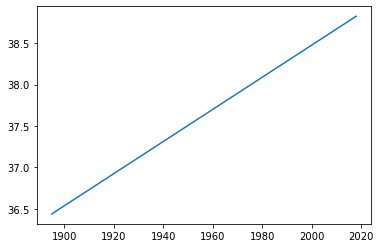

In [65]:
line = plt.plot(x, y)

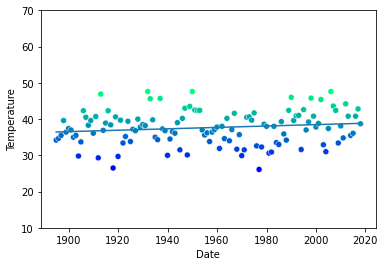

In [69]:
# Plotting both regression line and scatterplot
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10, 70) # scale the y axis to see the linear relationship better
line = plt.plot(x, y)